In [1]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv(r"C:\Users\achal\Downloads\PRCP-1009-CellphonePrice\Data\datasets_11167_15520_train.csv")
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
df.info

<bound method DataFrame.info of       battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_wid

In [4]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [5]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

###  DISTRIBUTION FOR ALL NUMERICAL COLUMNS EXCEPT THE TARGET COLUMN

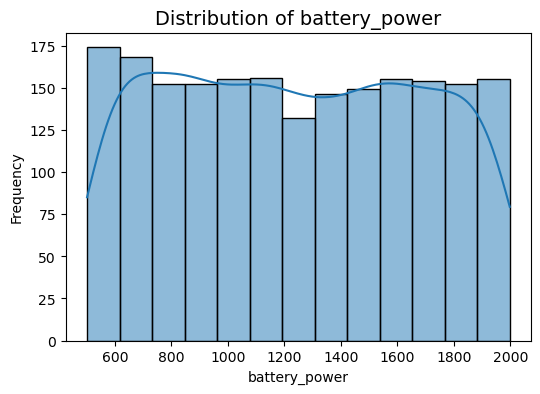

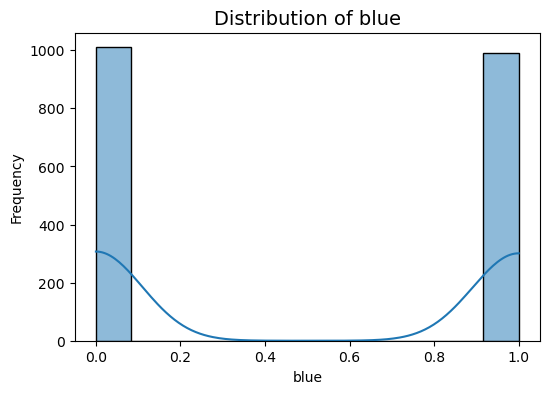

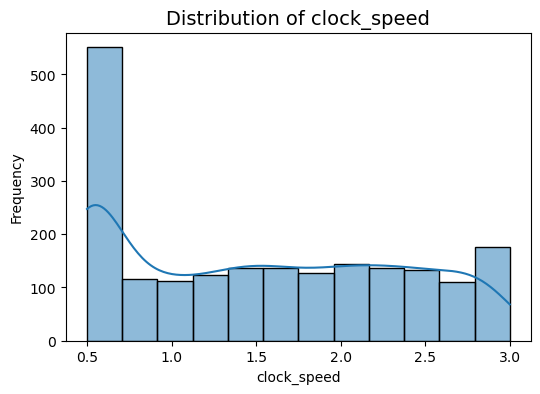

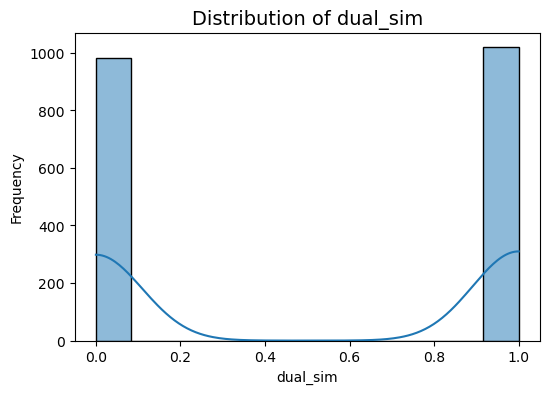

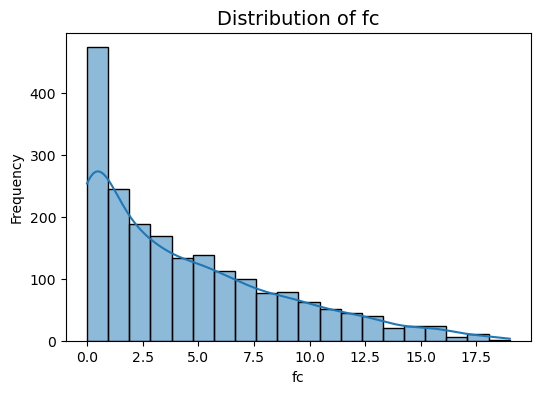

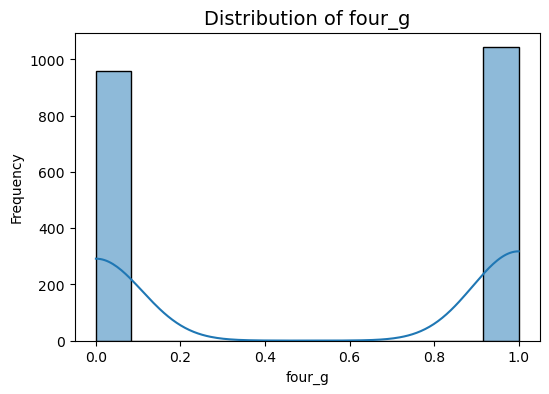

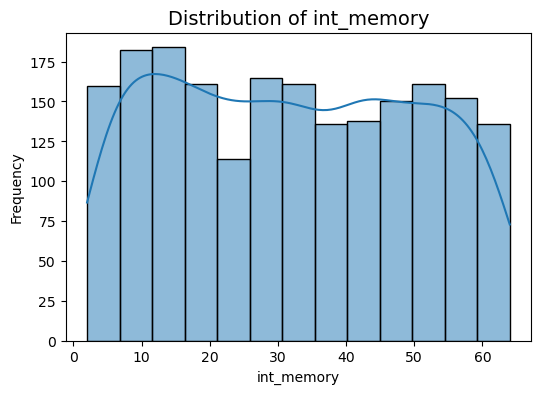

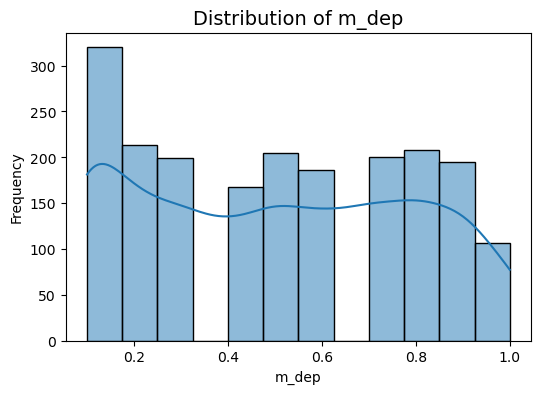

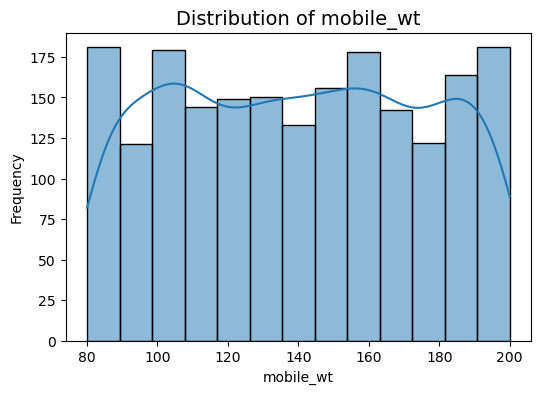

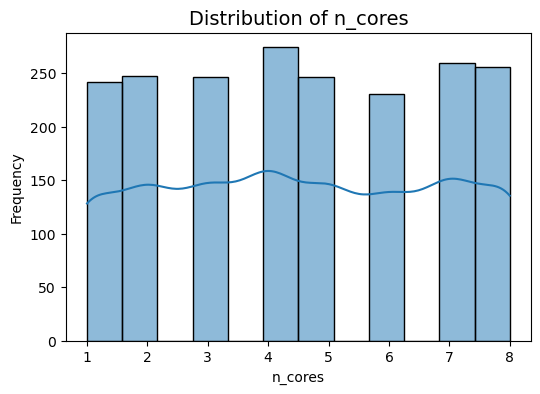

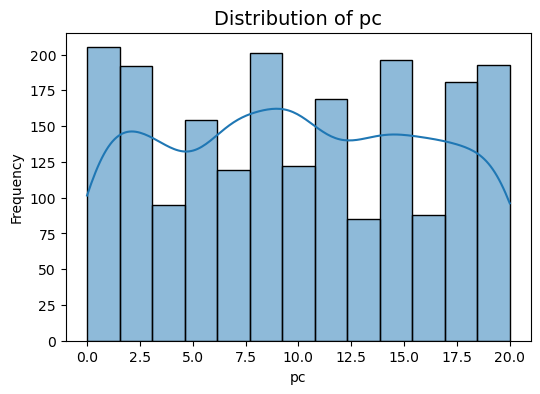

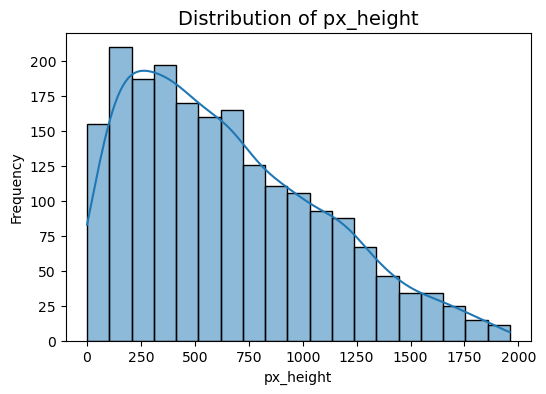

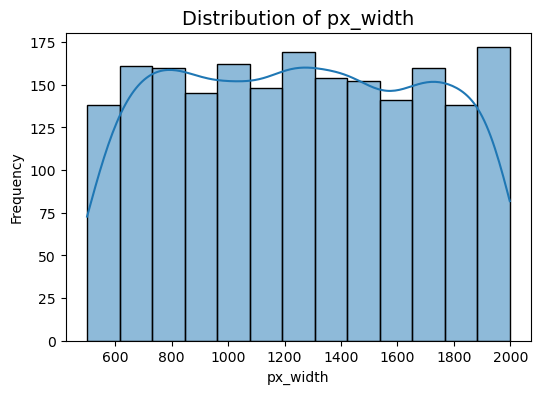

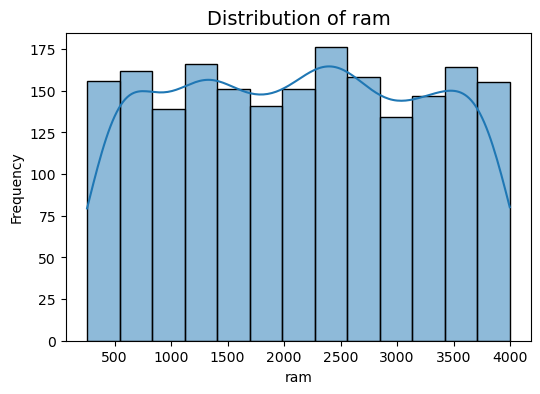

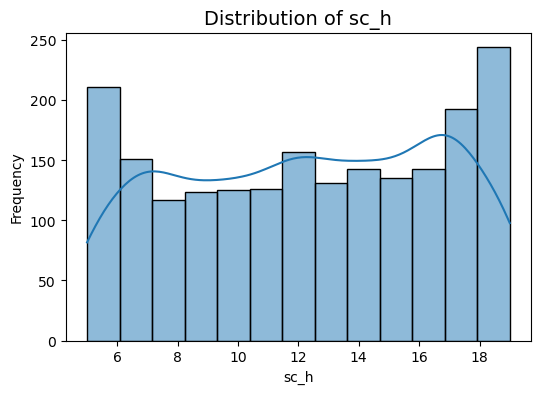

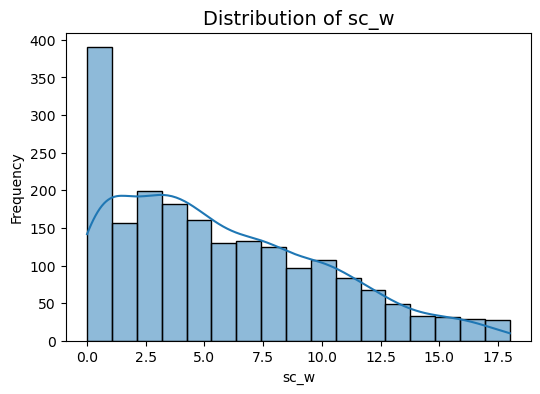

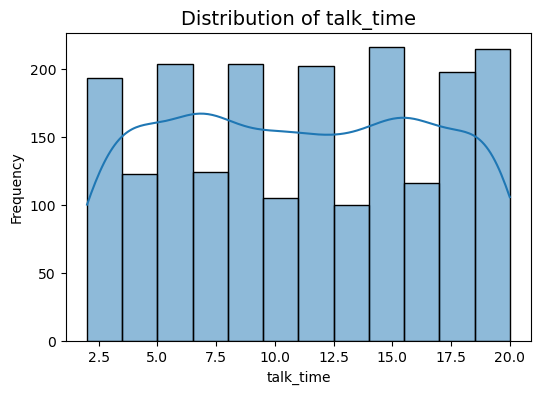

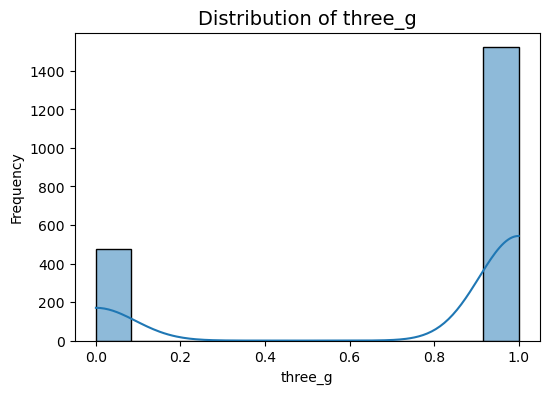

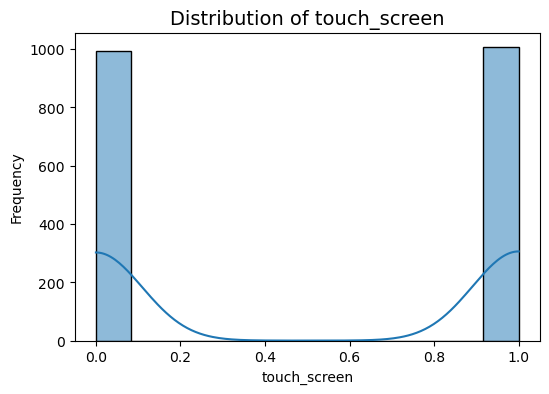

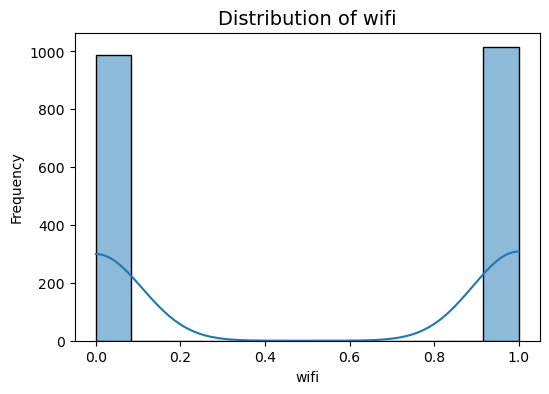

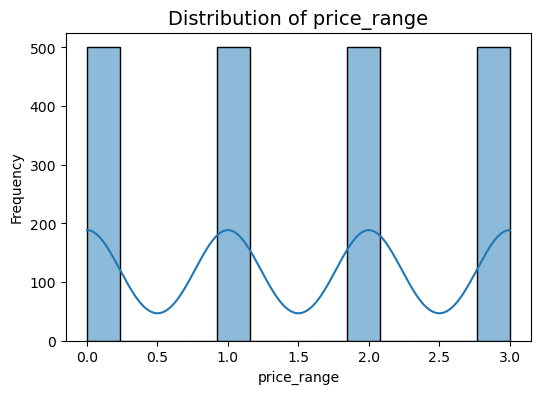

In [6]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# LOOP FOR DISTRIBUTION PLOT 
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

### GRID LAYOUT OF DISTRIBUTION PLOT FOR ALL COLUMNS

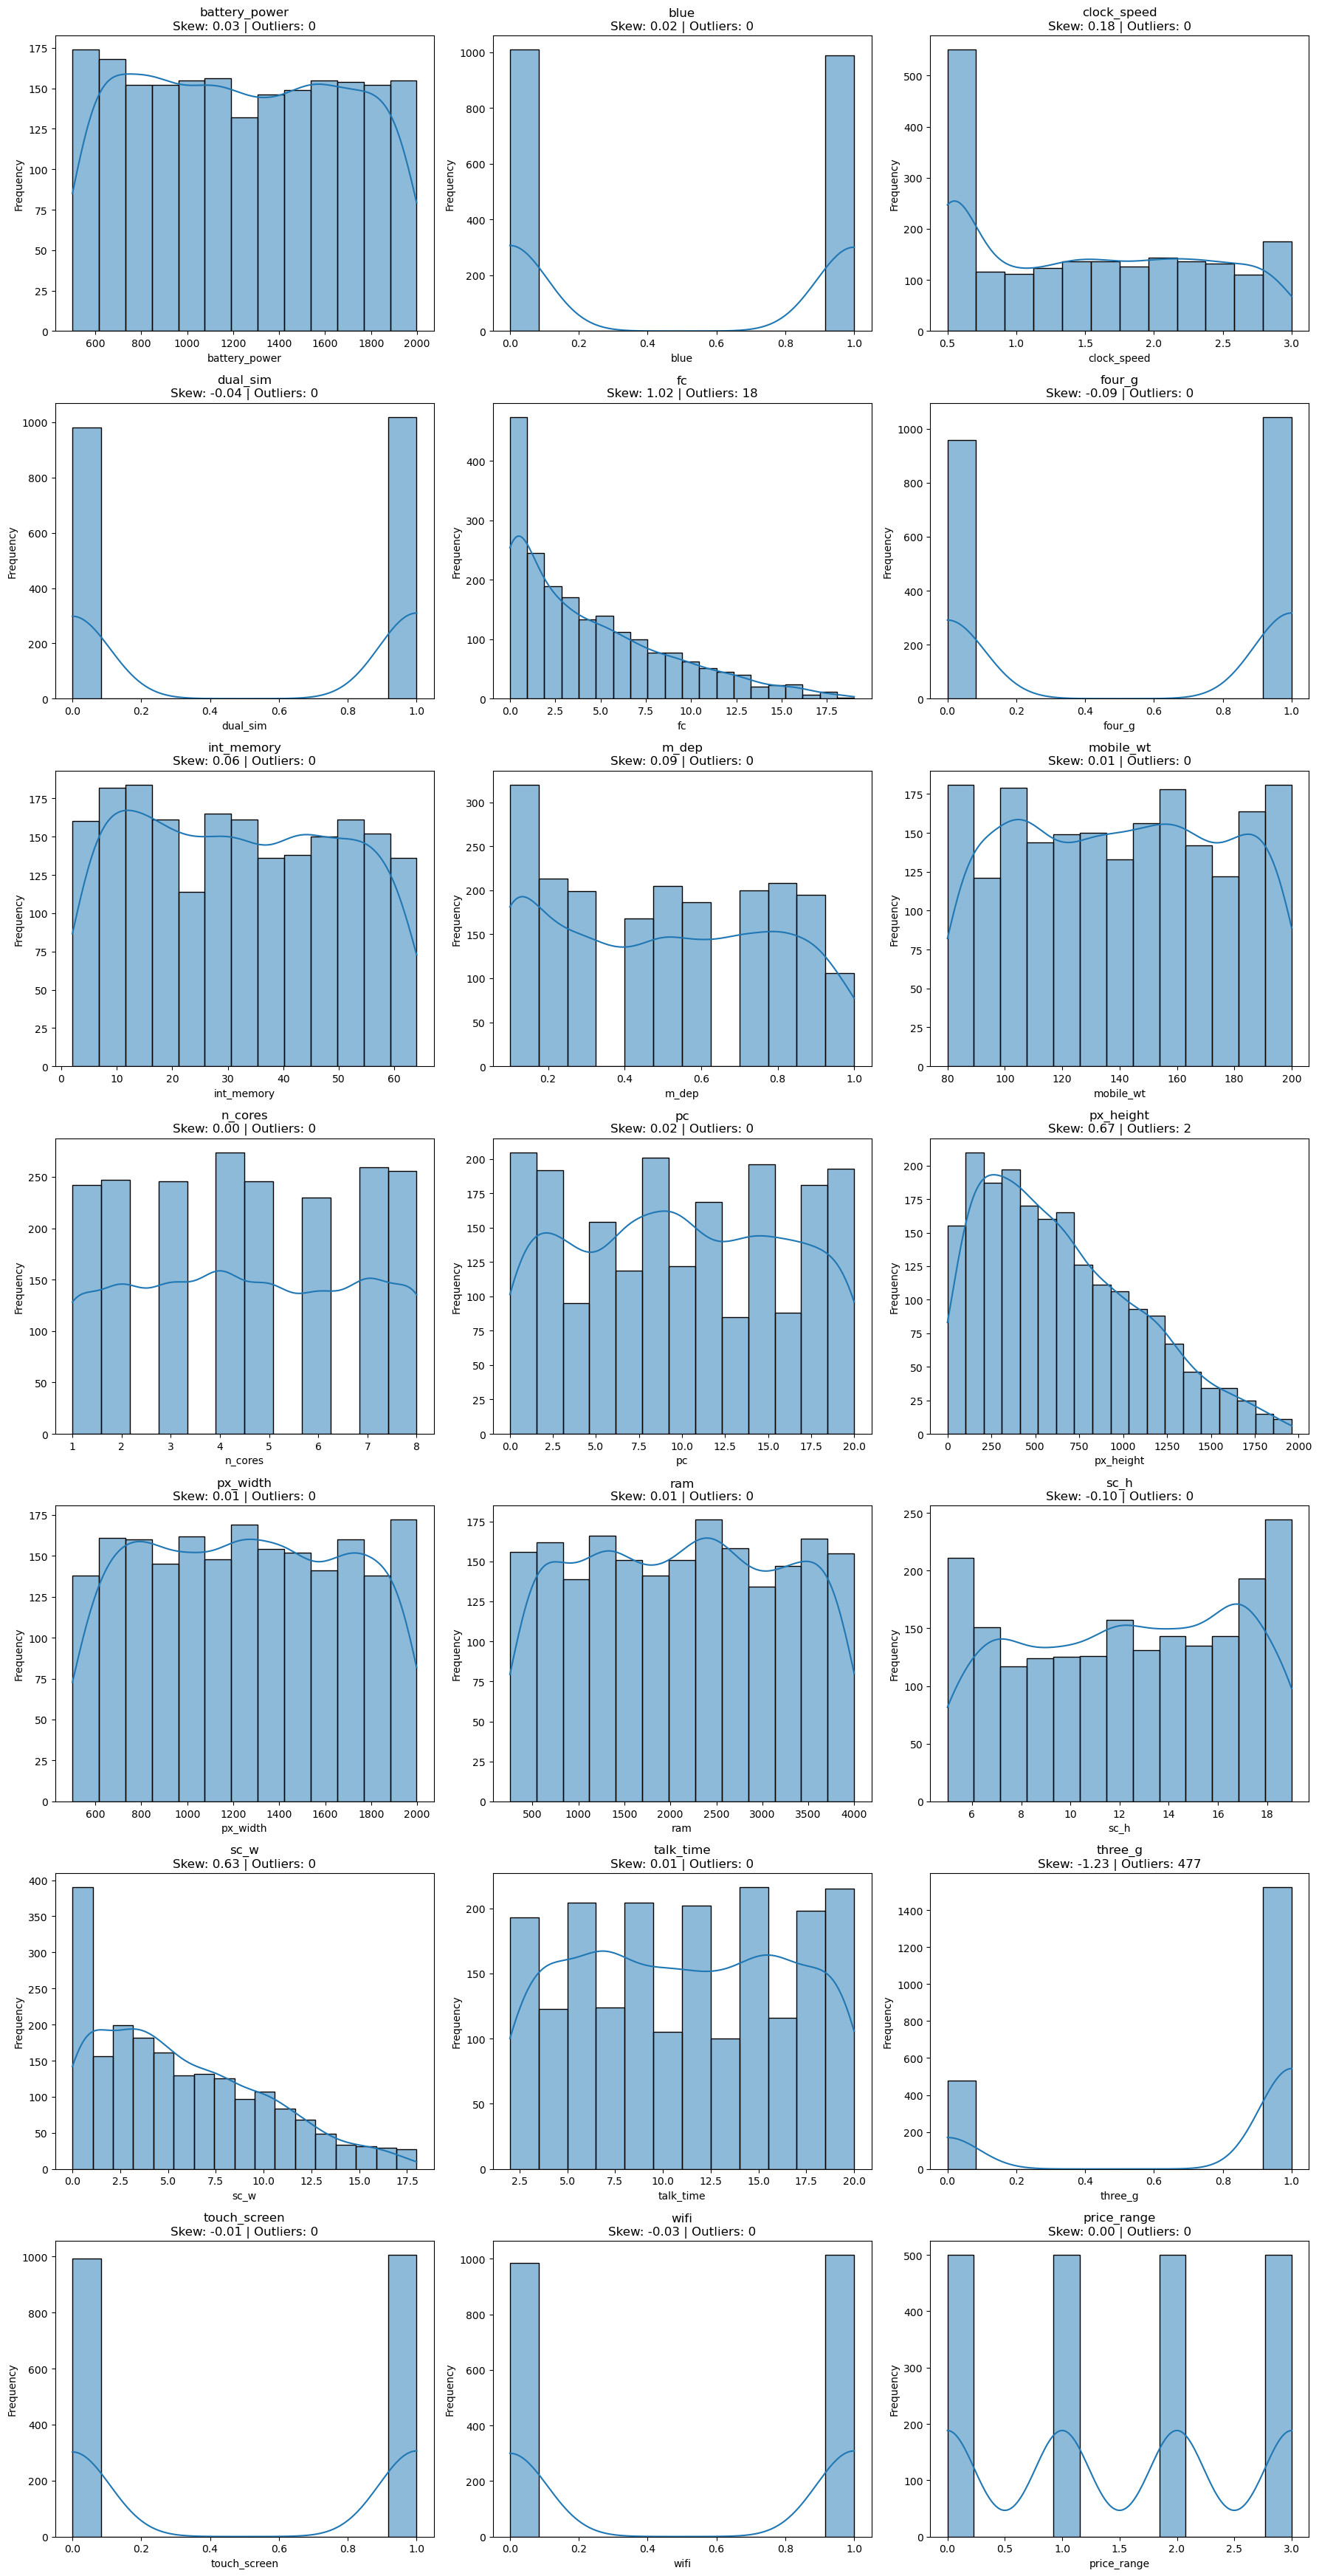

In [7]:
# Numerical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Grid setup
cols_per_row = 3
rows = math.ceil(len(num_cols) / cols_per_row)
fig, axes = plt.subplots(rows, cols_per_row, figsize=(18, 5*rows))

# Flatten axes array for easy indexing
axes = axes.flatten()

# Loop over each numerical column
for i, col in enumerate(num_cols):
    ax = axes[i]
    sns.histplot(df[col], kde=True, ax=ax)
    
    # Skewness
    skewness = skew(df[col])
    
    # Outlier count (IQR method)
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_count = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
    
    # Title
    ax.set_title(f'{col}\nSkew: {skewness:.2f} | Outliers: {outlier_count}', fontsize=12)
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")

# Hide unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### USING WINSORIZING METHOD TO FIX OUTLIERS

In [8]:
cols_with_outliers = ['px_height', 'fc']

for col in cols_with_outliers:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[col] = np.where(df[col] < lower_bound, lower_bound,
                       np.where(df[col] > upper_bound, upper_bound, df[col]))

### DISTRIBUTION SKEWNESS GRAPH AFTER WORKING ON OUTLIERS

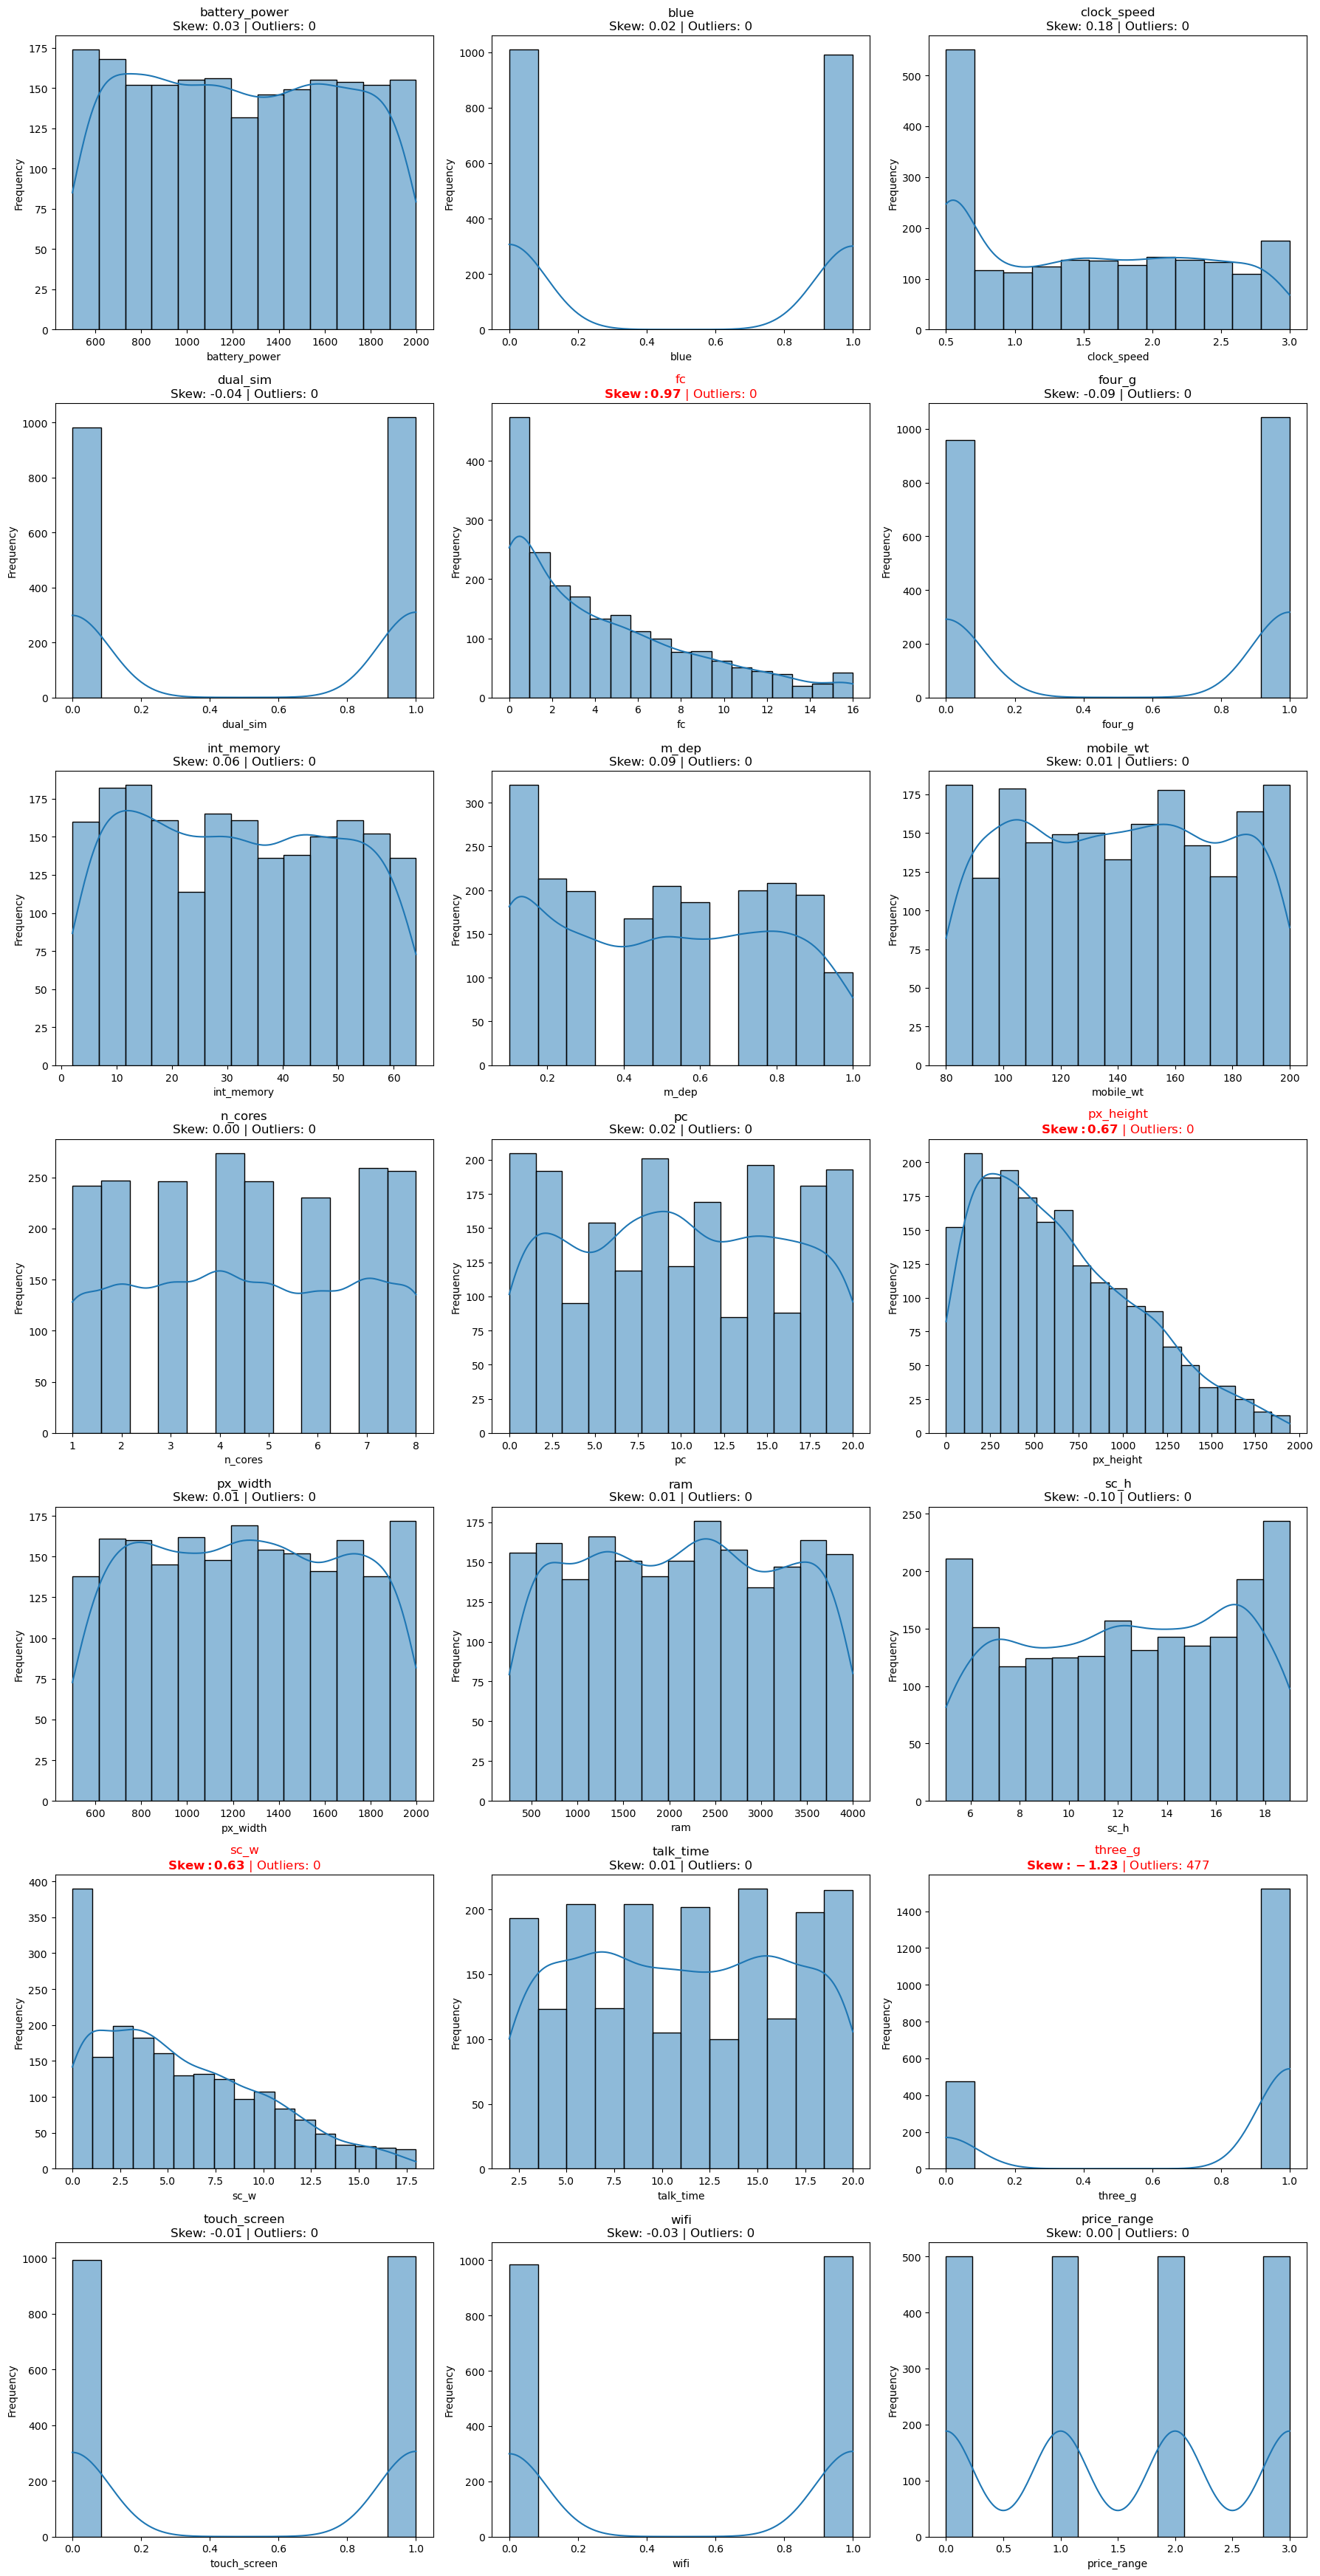

In [9]:
# Numerical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Grid setup
cols_per_row = 3
rows = math.ceil(len(num_cols) / cols_per_row)
fig, axes = plt.subplots(rows, cols_per_row, figsize=(18, 5*rows))

axes = axes.flatten()

for i, col in enumerate(num_cols):
    ax = axes[i]
    sns.histplot(df[col], kde=True, ax=ax)
    
    # Skewness
    skewness = skew(df[col])
    
    # Outlier count (IQR method)
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_count = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
    
    # Skewness color condition
    if skewness > 0.5 or skewness < -0.5:
        skew_text = f"Skew: {skewness:.2f}"
        title = f"{col}\n" + r"$\bf{" + skew_text + "}$" + f" | Outliers: {outlier_count}"
        ax.set_title(title, fontsize=12, color="red")
    else:
        ax.set_title(f"{col}\nSkew: {skewness:.2f} | Outliers: {outlier_count}", fontsize=12)
    
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")

# Hide unused subplots (if any)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



### FIXING SKEWNESS FOR FC, PX_HEIGHT, SC_W USING LOG TRANFORMATION

In [10]:
df['fc_log'] = np.log1p(df['fc'])          # log(1+x) safe for zero values
df['px_height_log'] = np.log1p(df['px_height'])
df['sc_w_log'] = np.log1p(df['sc_w'])

### SKEWNESS COMPARISON TABLE BEFORE AND AFTER

In [11]:
cols = ['fc', 'px_height', 'sc_w']

# Dictionary to store results
results = {'Column': [], 'Before Skewness': [], 'After Skewness (Log)': []}

for col in cols:
    before_skew = skew(df[col])
    
    # Log transform (safe for zeros)
    new_col = col + "_log"
    df[new_col] = np.log1p(df[col])
    
    after_skew = skew(df[new_col])
    
    results['Column'].append(col)
    results['Before Skewness'].append(round(before_skew, 3))
    results['After Skewness (Log)'].append(round(after_skew, 3))

# Convert to DataFrame
skew_comparison = pd.DataFrame(results)
print(skew_comparison)

      Column  Before Skewness  After Skewness (Log)
0         fc            0.969                -0.125
1  px_height            0.665                -1.513
2       sc_w            0.633                -0.603


### SKEWNESS GRAPH BEFORE AND AFTER TRANSFORMATION. COLS = ['PX_HEIGHT', 'SC_W']

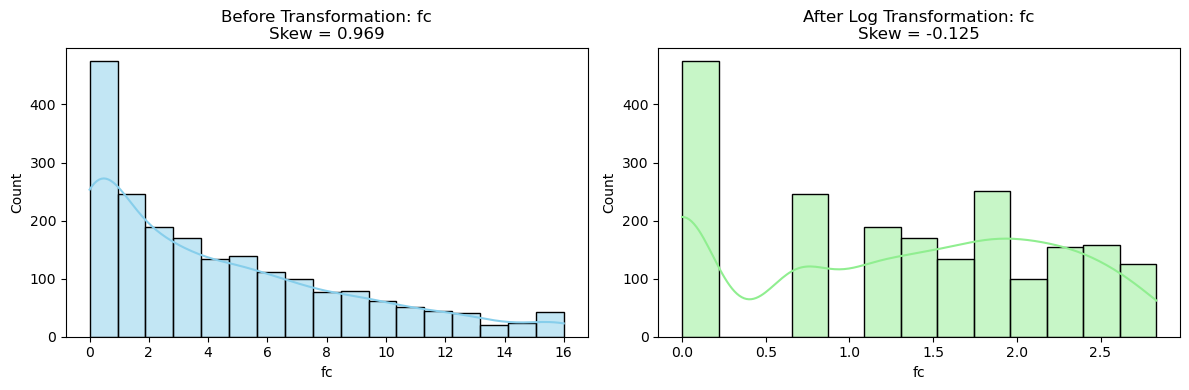

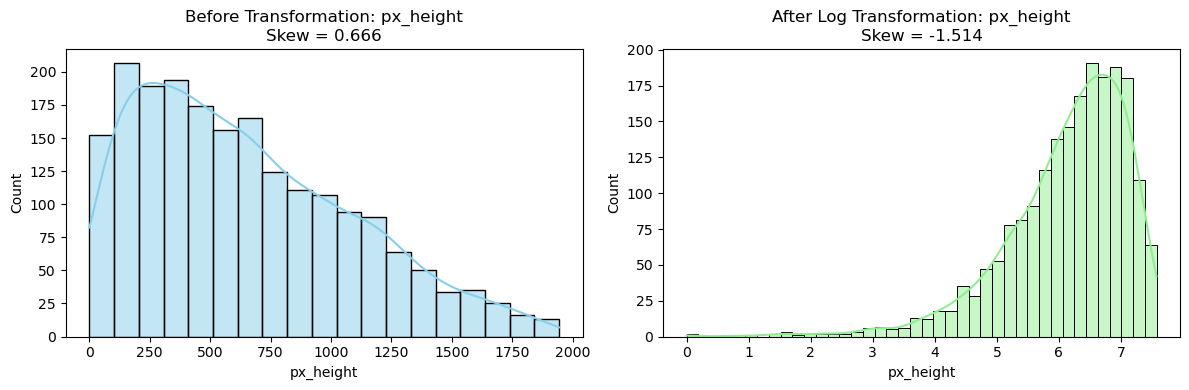

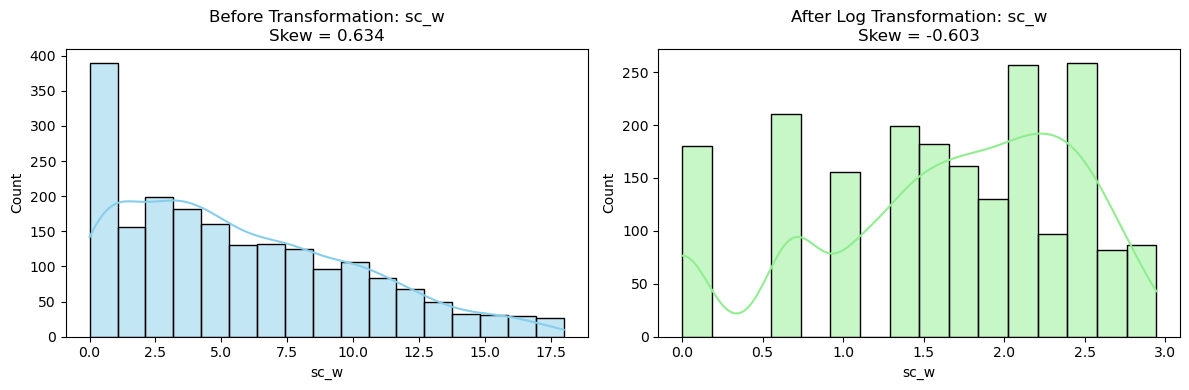

In [12]:

for col in cols:
    fig, axes = plt.subplots(1, 2, figsize=(12,4))
    
    # Before transformation
    sns.histplot(df[col], kde=True, ax=axes[0], color="skyblue")
    axes[0].set_title(f"Before Transformation: {col}\nSkew = {round(df[col].skew(),3)}")
    
    # After log transformation
    transformed = np.log1p(df[col])
    sns.histplot(transformed, kde=True, ax=axes[1], color="lightgreen")
    axes[1].set_title(f"After Log Transformation: {col}\nSkew = {round(transformed.skew(),3)}")
    
    plt.tight_layout()
    plt.show()

### CUBE TRANSFORMATION FOR PX_HEIGHT AND SQUARE TRANSFORMATION FOR SC_W AFTER LOG TRANSFORMATION SINCE LOG TRANFORMATION DIDN'T FIX THE SKEWNESS

In [13]:

df['px_height_log_cube'] = (np.log1p(df['px_height'])) ** 3
print("px_height (Log + Cube) Skew:", df['px_height_log_cube'].skew())

# SC_W (SQUARE TRANSFORMATION)
df['sc_w_log_sq'] = (np.log1p(df['sc_w'])) ** 2
print("sc_w (Log + Square) Skew:", df['sc_w_log_sq'].skew())

px_height (Log + Cube) Skew: -0.30987979983992164
sc_w (Log + Square) Skew: 0.2535468073717407


In [14]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,talk_time,three_g,touch_screen,wifi,price_range,fc_log,px_height_log,sc_w_log,px_height_log_cube,sc_w_log_sq
0,842,0,2.2,0,1.0,0,7,0.6,188,2,...,19,0,0,1,1,0.693147,3.044522,2.079442,28.220034,4.324077
1,1021,1,0.5,1,0.0,1,53,0.7,136,3,...,7,1,1,0,2,0.000000,6.809039,1.386294,315.687600,1.921812
2,563,1,0.5,1,2.0,1,41,0.9,145,5,...,9,1,1,0,2,1.098612,7.142037,1.098612,364.305904,1.206949
3,615,1,2.5,0,0.0,0,10,0.8,131,6,...,11,1,0,0,2,0.000000,7.104144,2.197225,358.538077,4.827796
4,1821,1,1.2,0,13.0,1,44,0.6,141,2,...,15,1,1,0,1,2.639057,7.097549,1.098612,357.540441,1.206949


In [ ]:
### BACKUP COPY OF DF WITHOUT TRANFORMED VALUES
df_original = df.copy()

# REPLACING TRANSFORMED COLUMNS
replace_cols = {
    'fc_log': 'fc',
    'px_height_log': 'px_height',
    'sc_w_log': 'sc_w',
    'px_height_log_cube': 'px_height',
    'sc_w_log_sq': 'sc_w'
}

# Overwrite transformed values into original columns
for new_col, old_col in replace_cols.items():
    if new_col in df.columns:
        df[old_col] = df[new_col]

# Extra transformed columns drop
df.drop(columns=replace_cols.keys(), inplace=True, errors='ignore')

print(df.head())

In [16]:
df.copy()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,0.693147,0,7,0.6,188,2,...,28.220034,756,2549,9,4.324077,19,0,0,1,1
1,1021,1,0.5,1,0.000000,1,53,0.7,136,3,...,315.687600,1988,2631,17,1.921812,7,1,1,0,2
2,563,1,0.5,1,1.098612,1,41,0.9,145,5,...,364.305904,1716,2603,11,1.206949,9,1,1,0,2
3,615,1,2.5,0,0.000000,0,10,0.8,131,6,...,358.538077,1786,2769,16,4.827796,11,1,0,0,2
4,1821,1,1.2,0,2.639057,1,44,0.6,141,2,...,357.540441,1212,1411,8,1.206949,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0.000000,1,2,0.8,106,6,...,359.283217,1890,668,13,2.590290,19,1,1,0,0
1996,1965,1,2.6,1,0.000000,0,39,0.2,187,4,...,317.216851,1965,2032,11,5.749902,16,1,1,1,2
1997,1911,0,0.9,1,0.693147,1,36,0.7,108,8,...,309.923560,1632,3057,9,0.480453,5,1,1,0,3
1998,1512,0,0.9,0,1.609438,1,46,0.1,145,5,...,197.145795,670,869,18,5.749902,19,1,1,1,0


### CHECKING IF THERE'S ANY DUPLICATE VALUES

In [17]:
# CHECK DUPLICATE ROWS
duplicate_count = df.duplicated().sum()
print("Total duplicate rows:", duplicate_count)

# REMOVE DUPLICATE ROWS
df = df.drop_duplicates()

# PRINT TOTAL DUPLICATE ROWS
print("Shape after removing duplicates:", df.shape)

Total duplicate rows: 0
Shape after removing duplicates: (2000, 21)


In [18]:
# DROPPING "PRICE_RANGE" COLUMN TEMPORARILY
target = df.pop('price_range')

# ADDING IT IN THE LAST COLUMN
df['price_range'] = target

In [19]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,0.693147,0,7,0.6,188,2,...,28.220034,756,2549,9,4.324077,19,0,0,1,1
1,1021,1,0.5,1,0.000000,1,53,0.7,136,3,...,315.687600,1988,2631,17,1.921812,7,1,1,0,2
2,563,1,0.5,1,1.098612,1,41,0.9,145,5,...,364.305904,1716,2603,11,1.206949,9,1,1,0,2
3,615,1,2.5,0,0.000000,0,10,0.8,131,6,...,358.538077,1786,2769,16,4.827796,11,1,0,0,2
4,1821,1,1.2,0,2.639057,1,44,0.6,141,2,...,357.540441,1212,1411,8,1.206949,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0.000000,1,2,0.8,106,6,...,359.283217,1890,668,13,2.590290,19,1,1,0,0
1996,1965,1,2.6,1,0.000000,0,39,0.2,187,4,...,317.216851,1965,2032,11,5.749902,16,1,1,1,2
1997,1911,0,0.9,1,0.693147,1,36,0.7,108,8,...,309.923560,1632,3057,9,0.480453,5,1,1,0,3
1998,1512,0,0.9,0,1.609438,1,46,0.1,145,5,...,197.145795,670,869,18,5.749902,19,1,1,1,0


In [20]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   float64
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   float64
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   float64
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

### # TWO DATASETS ONE WITH SCALED VALUES AND ONE ORIGINAL DATASET WITHOUT SCALING FOR RANDOM FOREST MODEL

In [22]:

X = df.drop("price_range", axis=1)
y = df["price_range"]

# SCALED VERSION (FOR LOGISTIC REGRESSION, KNN, SVM, ETC.)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### TWO DATASETS ONE WITH SCALED VALUES AND ONE ORIGINAL DATASET WITHOUT SCALING FOR RANDOM FOREST MODEL

In [23]:
### TRAIN TEST SPLIT FOR X AND X_SCALED DATAEST WITH Y_TRAIN AND Y_TEST

# For scaled models
X_scaled_train, X_scaled_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# For tree-based models (no scaling)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

### LOGISTIC REGRESSION WITH ACCURACY REPORT

In [24]:

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_scaled_train, y_train)

y_pred_lr = log_reg.predict(X_scaled_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.95
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       100
           1       0.93      0.95      0.94       100
           2       0.95      0.90      0.92       100
           3       0.94      0.98      0.96       100

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400



### RANDOM FOREST MODEL WITH ACCURACY REPORT

In [25]:

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.8875
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       100
           1       0.83      0.84      0.84       100
           2       0.84      0.81      0.82       100
           3       0.94      0.94      0.94       100

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.89      0.89      0.89       400



### XGBOOST MODEL

In [26]:

from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb.fit(X_train, y_train)   # unscaled data (tree-based model hai)

# Predictions
y_pred_xgb = xgb.predict(X_test)

# Evaluation
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

C:\Users\achal\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:41:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.9325
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       100
           1       0.92      0.94      0.93       100
           2       0.89      0.88      0.88       100
           3       0.95      0.92      0.93       100

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400



### IDENTIFYING IMPORTANT FEATURES FROM THE DATASETS WHICH IMPACTS THE PRICE RANGE & ACCURACY- RANDOM FOREST MODEL

Random Forest Feature Importance:
ram              0.479900
battery_power    0.073266
px_height        0.055842
px_width         0.055835
mobile_wt        0.038944
int_memory       0.035171
talk_time        0.031995
pc               0.029369
clock_speed      0.028690
sc_w             0.028055
dtype: float64


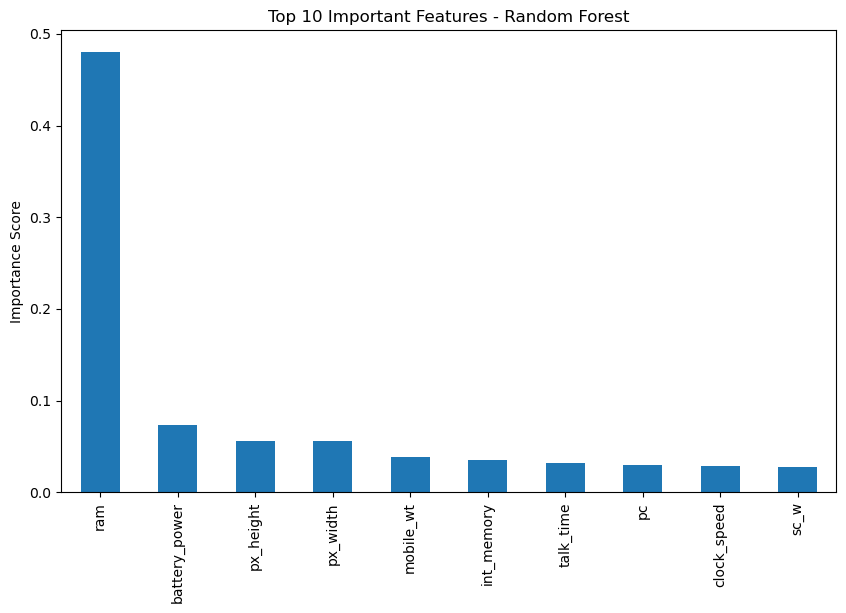

In [27]:
### IDENTIFYING IMPORTANT FEATURES FROM THE DATASETS WHICH IMPACTS THE PRICE RANGE

# Feature importance 
rf_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Print Top 10 features
print("Random Forest Feature Importance:")
print(rf_importance.head(10))

# Plot
plt.figure(figsize=(10,6))
rf_importance.head(10).plot(kind='bar')
plt.title("Top 10 Important Features - Random Forest")
plt.ylabel("Importance Score")
plt.show()

### IDENTIFYING IMPORTANT FEATURES FROM THE DATASETS WHICH IMPACTS THE PRICE RANGE & ACCURACY- LOGISTIC REGRESSION MODEL

Logistic Regression Feature Importance:
ram              10.818773
battery_power     2.664239
px_width          1.725437
px_height         1.395758
mobile_wt         0.446556
wifi              0.259514
int_memory        0.218253
dual_sim          0.123402
four_g            0.085772
blue              0.084830
dtype: float64


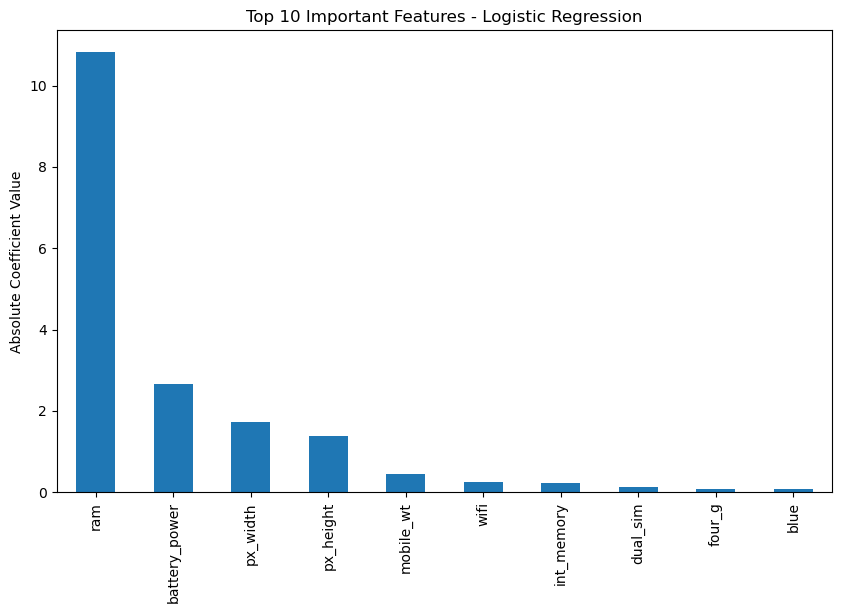

In [28]:

log_reg_importance = pd.Series(np.abs(log_reg.coef_[0])
                               +, index=X.columns).sort_values(ascending=False)

# Print Top 10 features
print("Logistic Regression Feature Importance:")
print(log_reg_importance.head(10))

# Plot
plt.figure(figsize=(10,6))
log_reg_importance.head(10).plot(kind='bar')
plt.title("Top 10 Important Features - Logistic Regression")
plt.ylabel("Absolute Coefficient Value")
plt.show()